In [7]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/7_learnATrue_CDzeroFalse_psdlatentFalse.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
length = total_record.shape[0]

num_groups = length // 3
remainings = length - num_groups * 3

mask_ratio = [0.01, 0.05, 0.10]
mask_ratio_col = mask_ratio * num_groups + mask_ratio[:remainings]
total_record['mask_ratio'] = mask_ratio_col


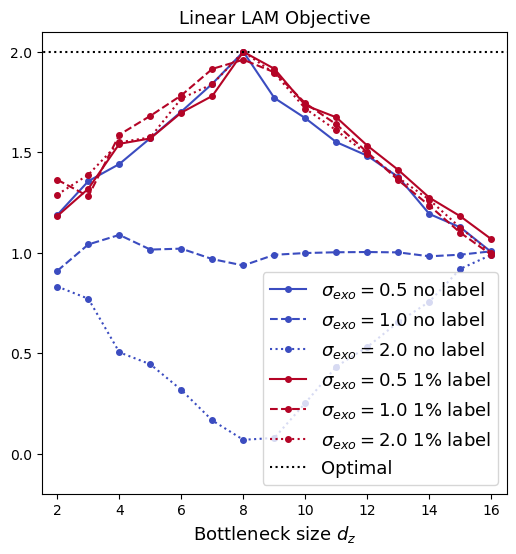

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/7_learnATrue_CDzeroFalse_psdlatentFalse_v2.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = (- total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']).clip(upper=2.0)


plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=1) 

record = total_record.loc[(total_record['sigma'] == 0.5) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=0.5$ no label', ls='solid', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 1.0) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=1.0$ no label', ls='dashed', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 2.0) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=2.0$ no label', ls='dotted', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 0.5) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=0.5$ 1% label', ls='solid', marker='o', markersize=4, color=cmap(norm(1)))

record = total_record.loc[(total_record['sigma'] == 1.0) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=1.0$ 1% label', ls='dashed', marker='o', markersize=4, color=cmap(norm(1)))

record = total_record.loc[(total_record['sigma'] == 2.0) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma_{exo}=2.0$ 1% label', ls='dotted', marker='o', markersize=4, color=cmap(norm(1)))


plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.ylim([-0.2, 2.1])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13, loc='lower right')